In [3]:
import numpy as np
import pymc as pm
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
from sklearn.datasets import make_regression
import statsmodels.api as sm

X, y = make_regression(n_samples=100, n_features=1, noise=10)

X = sm.add_constant(X)

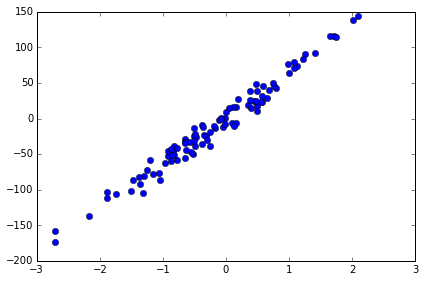

In [18]:
plt.plot(X[:,1], y, 'o')
plt.tight_layout()

In [34]:

b0 = pm.Normal('b0', mu = 0, tau = 20)
b1 = pm.Normal('b1', mu = 0, tau = 20)
error = pm.Uniform('error', 0, 20)

@pm.deterministic
def mu(X=X[:,1], b0=b0, b1=b1):
    return b0 + b1 * X


likelihood = pm.Normal('likelihood', mu = mu, tau = error, observed = True, value = y)

mcmc = pm.MCMC([b0, b1, mu, likelihood])
mcmc.sample(10000, 5000)

 [-----------------100%-----------------] 10000 of 10000 complete in 1.0 sec

Plotting b1
Plotting b0


/Users/mattevanoff/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


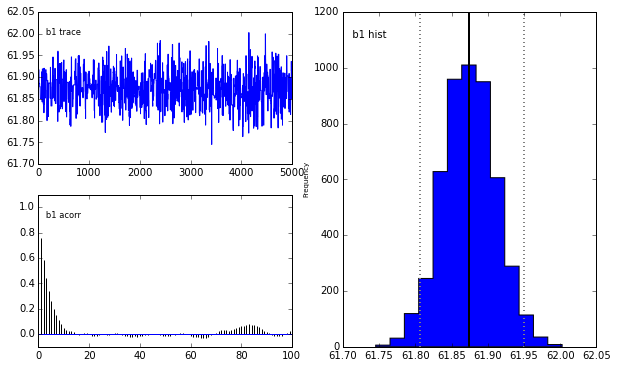

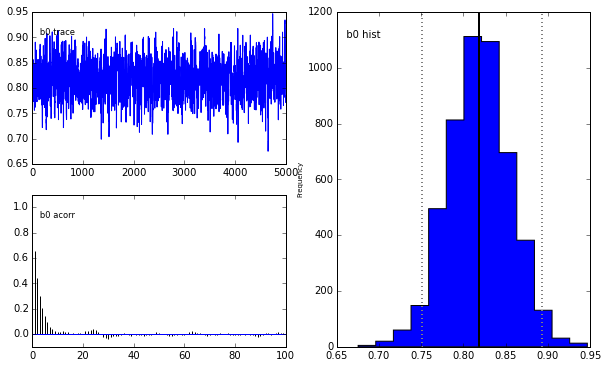

In [23]:
pm.Matplot.plot(mcmc)

In [28]:
mean_b0 = b0.stats()['mean']
mean_b1 = b1.stats()['mean']

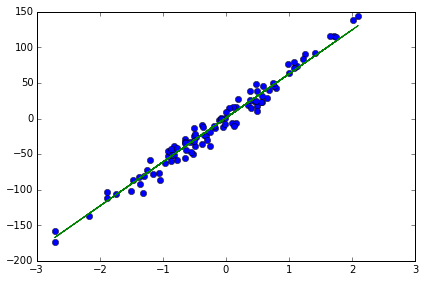

In [30]:
plt.plot(X[:,1], y, 'o')
plt.plot(X[:,1], mean_b0 + mean_b1 * X[:,1])
plt.tight_layout()